# Trabalho de Conclusão de Curso - TCC
### Turma - DSA T212
### Aluno : Drausio Gomes dos Santos
### Orientadora: Gabrielle Maria Romeiro Lombardi
### Tema: Construção e uso de modelos de grafos para representação e análise da estrutura organizacional da administração pública federal.
## Resultados Preliminares

### Etapa 4: Construção dos Grafos
<p> Construção das representações de estruturas organizacionais em grafos.</p>

#### Importando as bibliotecas

In [1]:
!pip install igraph
!pip install pycairo
!pip install cairocffi
!pip install python-igraph

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


#### Funções auxiliares

In [2]:
import time
import datetime as dt
from datetime import datetime
import pickle
import igraph as ig
from igraph import *
print("igraph : ",ig.__version__)
import pandas as pd
import pytz

class Main:     
    def show_current_time(self):
        ini = time.time()
        tz_SP = pytz.timezone('America/Sao_Paulo') 
        now = datetime.now(tz_SP)
        current_time = now.strftime("%d/%m/%Y %H:%M:%S")
        print("Current Time =", current_time)  

main = Main()

def calc_diff_in(ga,gb):
    g = ig.Graph(directed=True)
    edges_indices = []
    for ea in ga.es:
        eg = gb.es.select(lambda edge: edge.source_vertex["name"]  == ea.source_vertex["name"] and \
                            edge.target_vertex["name"] == ea.target_vertex["name"] ) 
        if (len(eg) > 0):
            continue  
        edges_indices.append(ea.index)
            
    print(edges_indices)        
          
    return ga.subgraph_edges(edges_indices)  

def imprime_grafo(g):
    for vx in g.vs:
        print(vx.attributes())       
    for es in g.es:
        print(es.source_vertex["name"],"---->", es.target_vertex["name"],es.attributes())    
    


igraph :  0.10.1


#### Estilo do gráfico


In [3]:
visual_style = {}
visual_style["bbox"] = (1350,2000)
visual_style["margin"] = 140
visual_style["vertex_color"] = 'green'
visual_style["vertex_frame_color"] = 'green'
visual_style["vertex_label_dist"] = 1.5
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"] = 12
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']
visual_style["edge_curved"] = True
visual_style_large = visual_style

visual_style = {}
visual_style["bbox"] = (600,400)
visual_style["margin"] = 120
visual_style["vertex_color"] = 'green'
visual_style["vertex_label_dist"] = 1.5
visual_style["vertex_label_angle"] = 1.5
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 10
visual_style["vertex_label_size"] = 7
visual_style["edge_curved"] = True
visual_style["margin"] = 120
visual_style_small = visual_style

#### Criando data frames para cada ano

In [4]:
anos = [2019,2020,2021,2022]
base_path = "C:/projetos/tcc_dsa_usp_esalq/"
filtro0 = 'Ministério da Educação'
filtro1 = 'Universidade'
listaAno=[]
dfs = []
for ano in anos:
    anoRef = str(ano)
    data_frame_orig = pd.read_csv(base_path + "dados/dou/" + anoRef + "/" + anoRef +".csv")
    data_frame = data_frame_orig[data_frame_orig["emissor"].str.contains(filtro0)]
    data_frame = data_frame[data_frame["emissor"].str.contains(filtro1)]
    data_frame["entidades"] = data_frame["emissor"].str.split("/")
    listaAno.append({"ano":ano, "df": data_frame  })    
    dfs.append(data_frame_orig)

big_frame = pd.concat(dfs, ignore_index=True)

#### Montando os grafos direcionados por Ano utlizando IGraph

In [5]:
print("Início da criação dos grafos anuais.")    
main.show_current_time()
print("------------------------------------") 
for ano in anos:
    g = ig.Graph(directed=True)
    g["name"]="Unidades Organizacionais da Administração Pública - " + str(ano)
    df_sample = listaAno[ano - 2019]["df"]
    print("qtd registros analisados: ", len(df_sample))
    for index, row in df_sample.iterrows(): 
        for index,ent in enumerate(row["entidades"]):
            if not filtro0 in ent and not filtro1 in ent:
                continue
            id = ent.replace(" da","").replace(" de","")
            try:
                vert = g.vs.find(id)                 
            except:
                if  index < 2 :
                    attributes = {}
                    attributes['weight'] = 0
                    vert = g.add_vertex(id, **attributes)
                    vert["label"]=ent                  
    
        for (index,ent) in enumerate(row['entidades']):            
            id = ent.replace(" da","").replace(" de","")
            if len(row['entidades']) > index+1 and index < 1 :
                if not filtro0 in row['entidades'][index+1] and not filtro1 in row['entidades'][index+1]:
                    continue
                id_b = row['entidades'][index+1].replace(" da","").replace(" de","")
                eg = g.es.select(lambda edge: edge.source_vertex["name"]  == id and \
                            edge.target_vertex["name"] == id_b ) 
                if not (len(eg) > 0):
                    g.add_edges([(id , id_b)])                       
    print("vertices: " +str(g.vcount()) + " arestas: " + str(g.ecount()), end='\r' )
    print(g.summary())
    with open("grafo"+str(ano)+".pkl", 'wb') as pickle_file:
        pickle.dump(g, pickle_file)
    print("------------------------------------")                 
print("Término da criação dos grafos anuais.")    
main.show_current_time()

Início da criação dos grafos anuais.
Current Time = 22/01/2023 14:05:33
------------------------------------
qtd registros analisados:  60986
IGRAPH DN-- 64 63 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v), weight (v)
------------------------------------
qtd registros analisados:  53545
IGRAPH DN-- 69 68 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v), weight (v)
------------------------------------
qtd registros analisados:  67768
IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v), weight (v)
------------------------------------
qtd registros analisados:  73194
IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v), weight (v)
------------------------------------
Término da criação dos grafos anuais.
Current Time = 22/01/2023 14:06:07


#### Visualizando os grafos

IGRAPH DN-- 64 63 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v), weight (v)


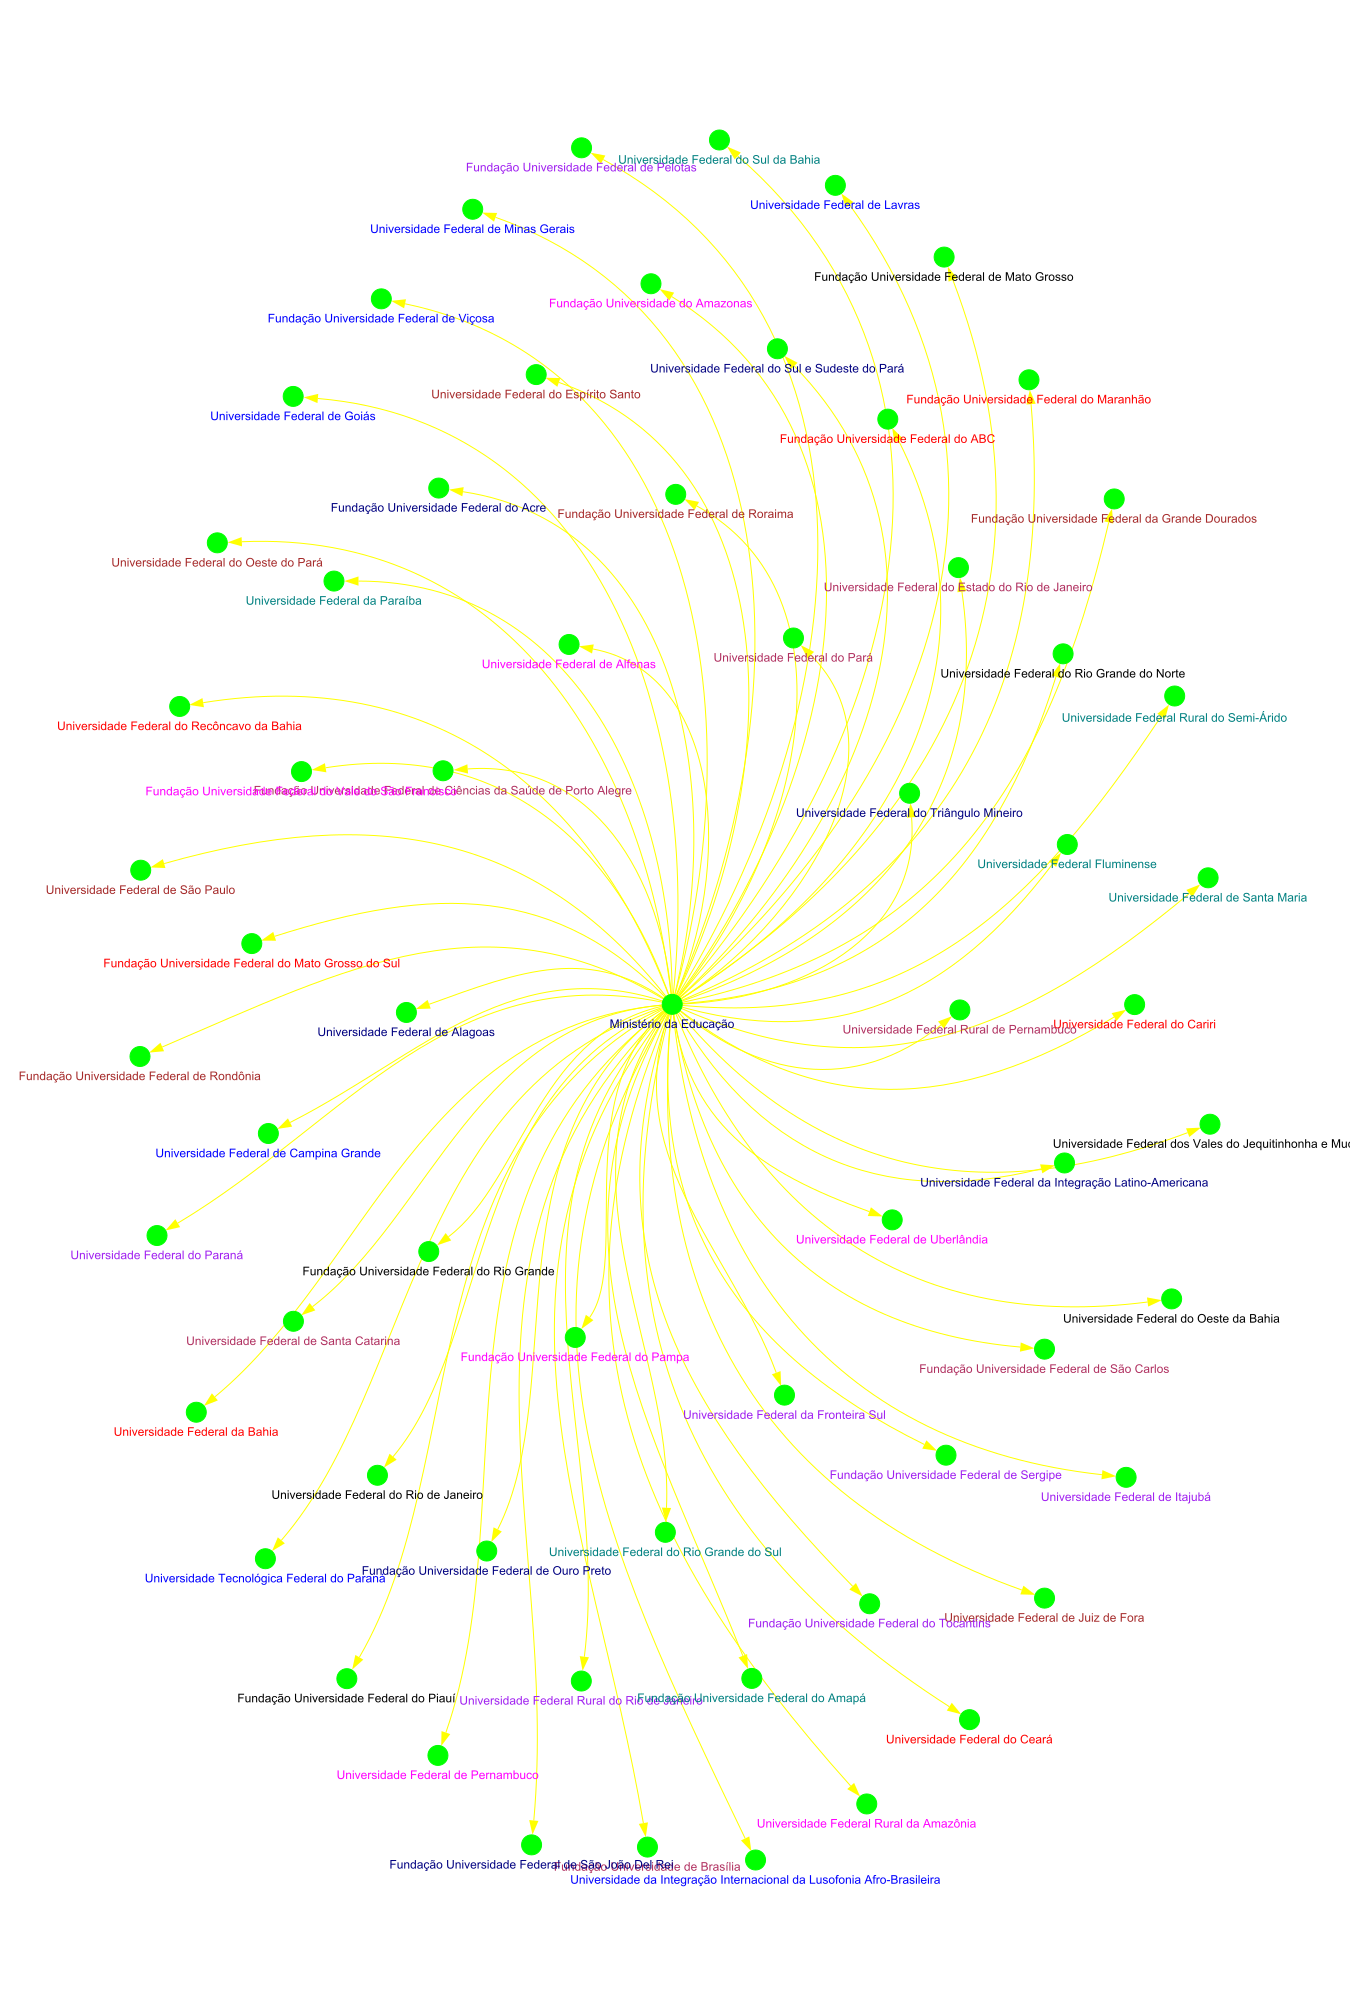

In [6]:
out_fig_name2019 = "grafo2019.eps"
grafo2019 = pickle.load(open("grafo2019.pkl", "rb"))
print(grafo2019.summary())
plot(grafo2019, out_fig_name2019, **visual_style_large)

IGRAPH DN-- 69 68 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v), weight (v)


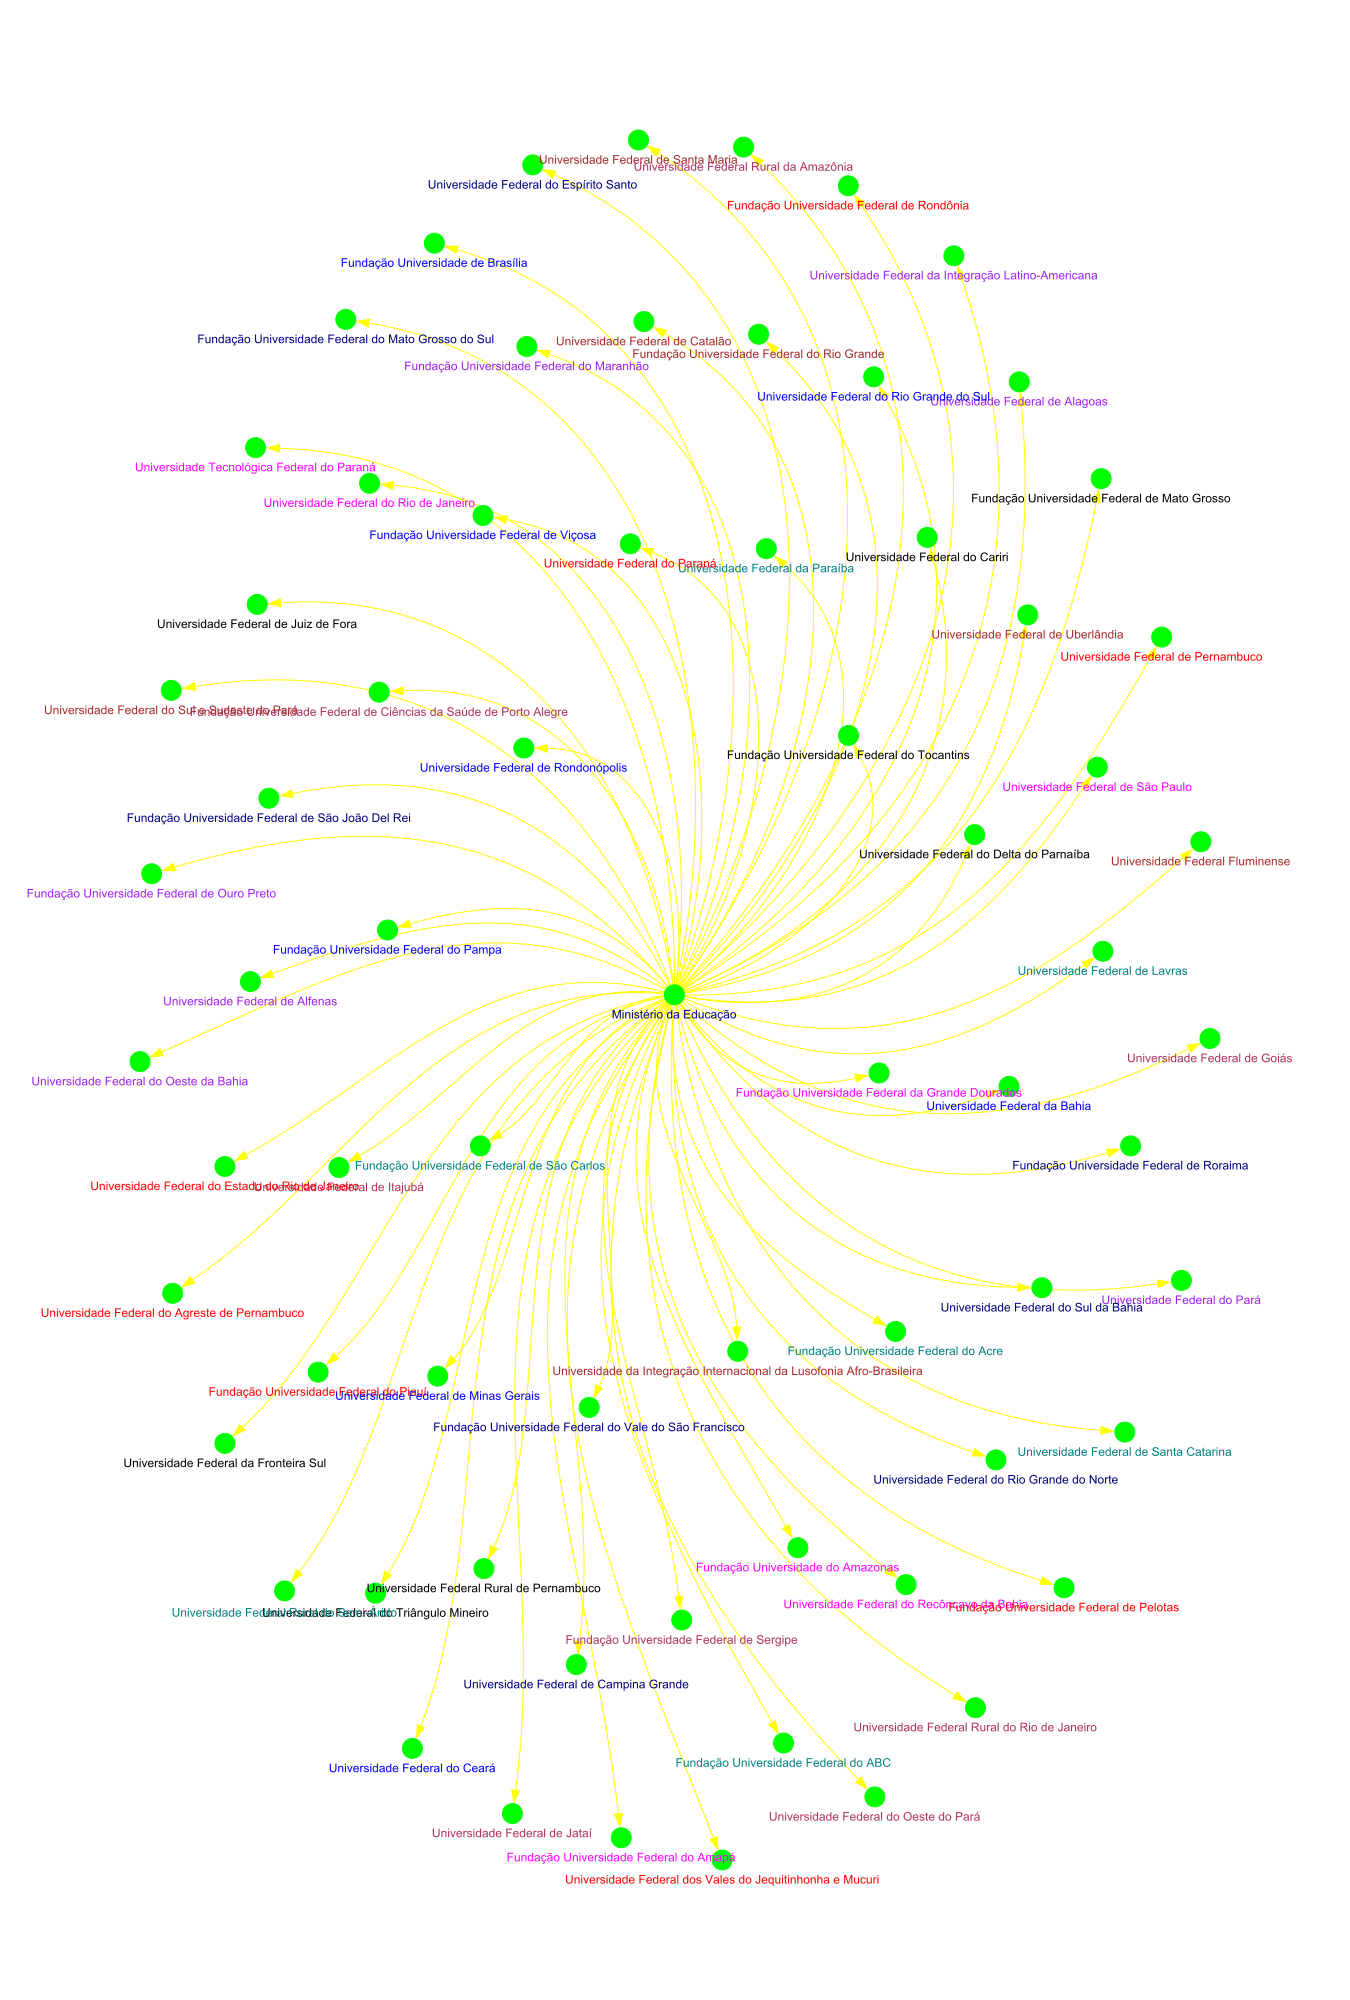

In [7]:
out_fig_name2020 = "grafo2020.eps"
grafo2020 = pickle.load(open("grafo2020.pkl", "rb"))
print(grafo2020.summary())
plot(grafo2020, out_fig_name2020, **visual_style_large)

IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v), weight (v)


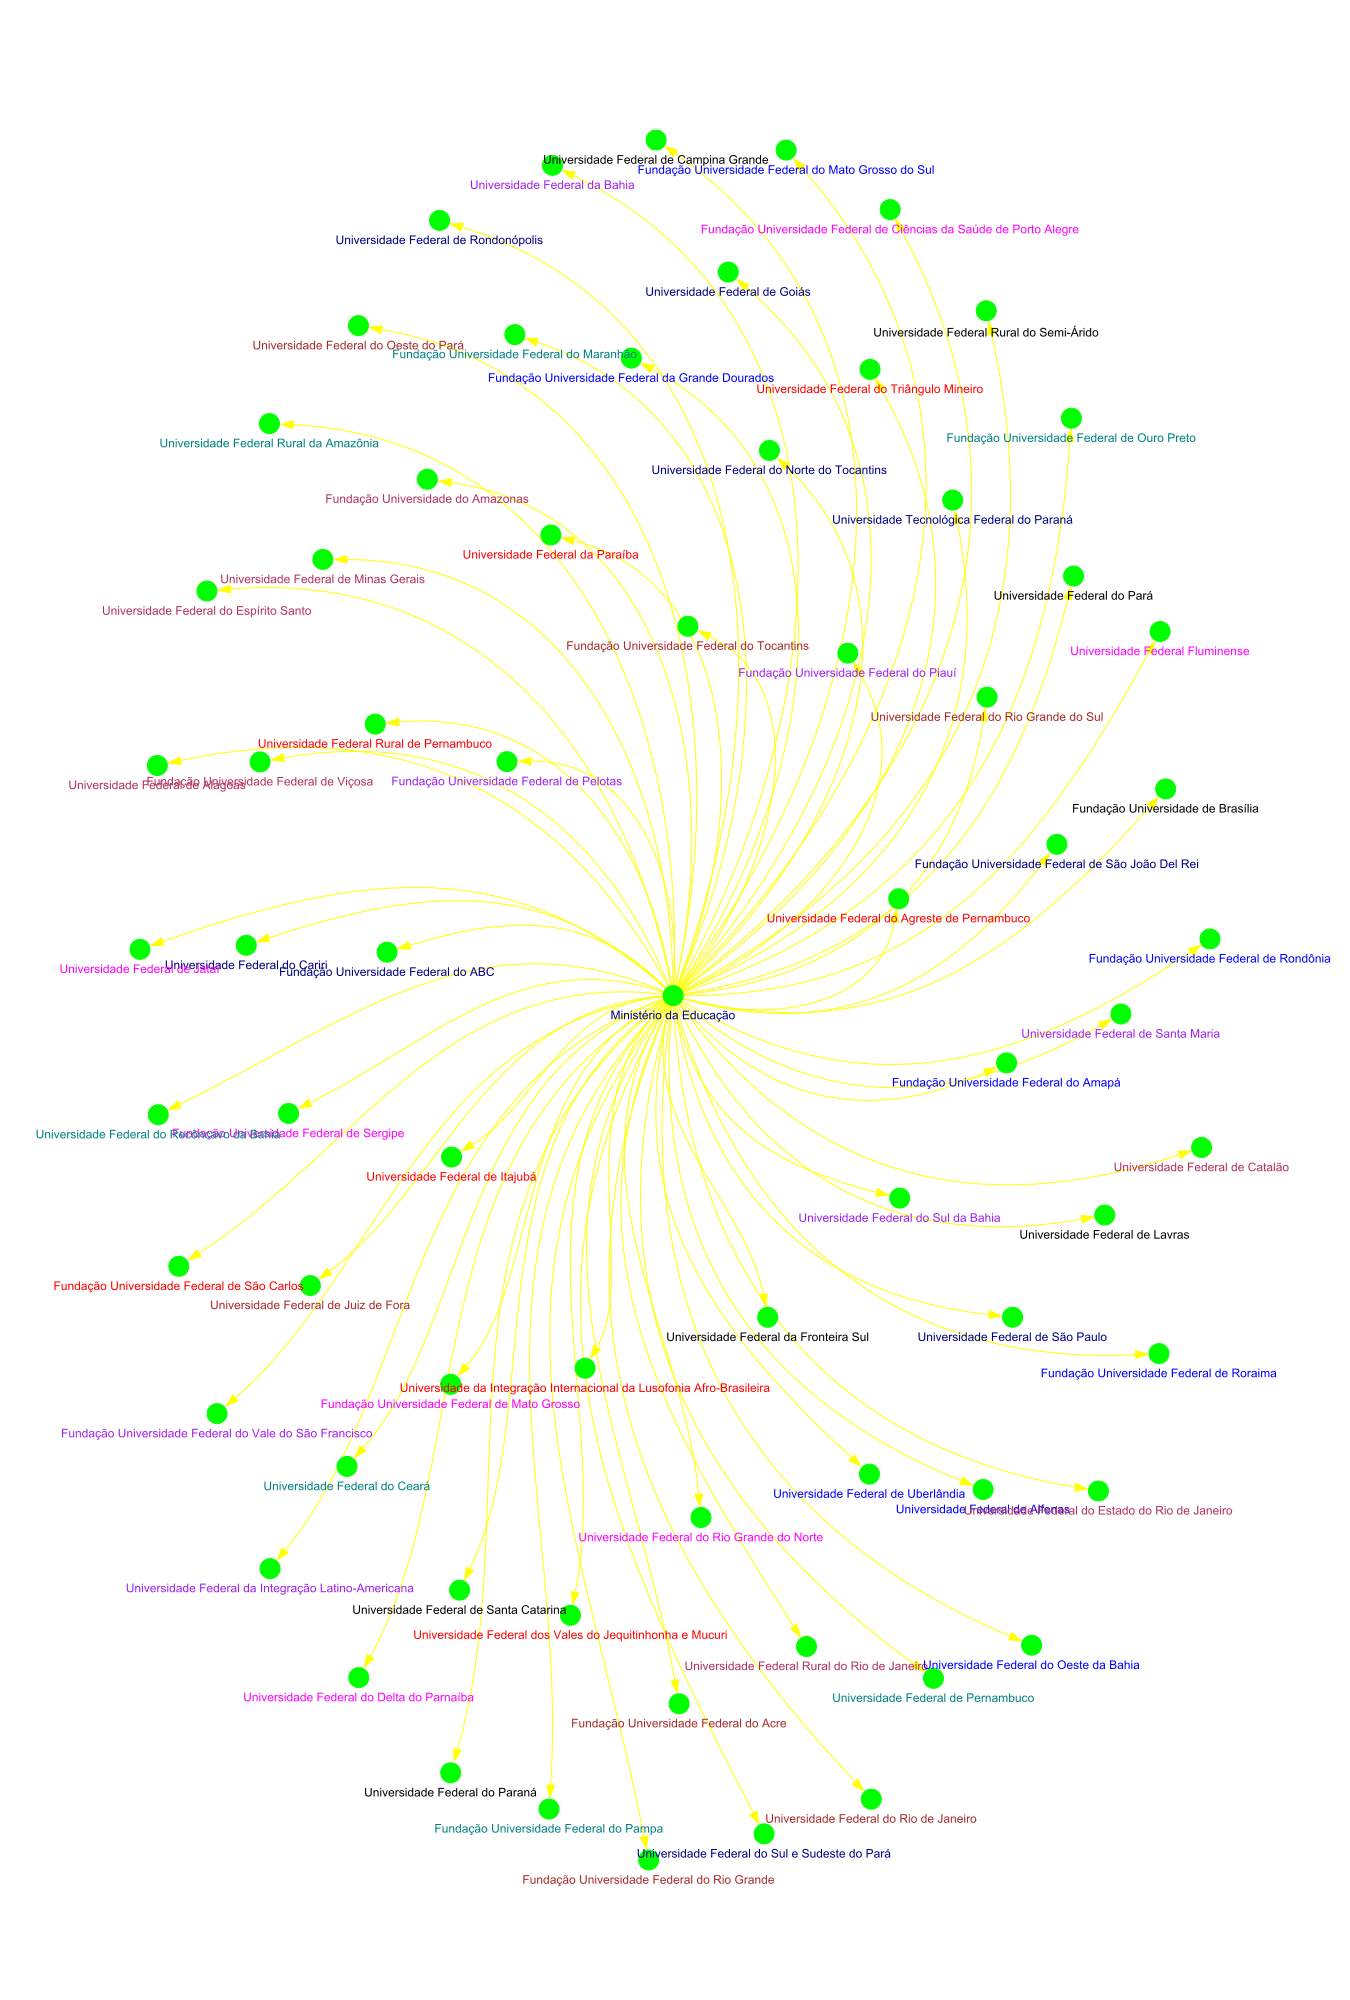

In [8]:
out_fig_name2021 = "grafo2021.eps"
grafo2021 = pickle.load(open("grafo2021.pkl", "rb"))
print(grafo2021.summary())
plot(grafo2021, out_fig_name2021, **visual_style_large)

IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v), weight (v)


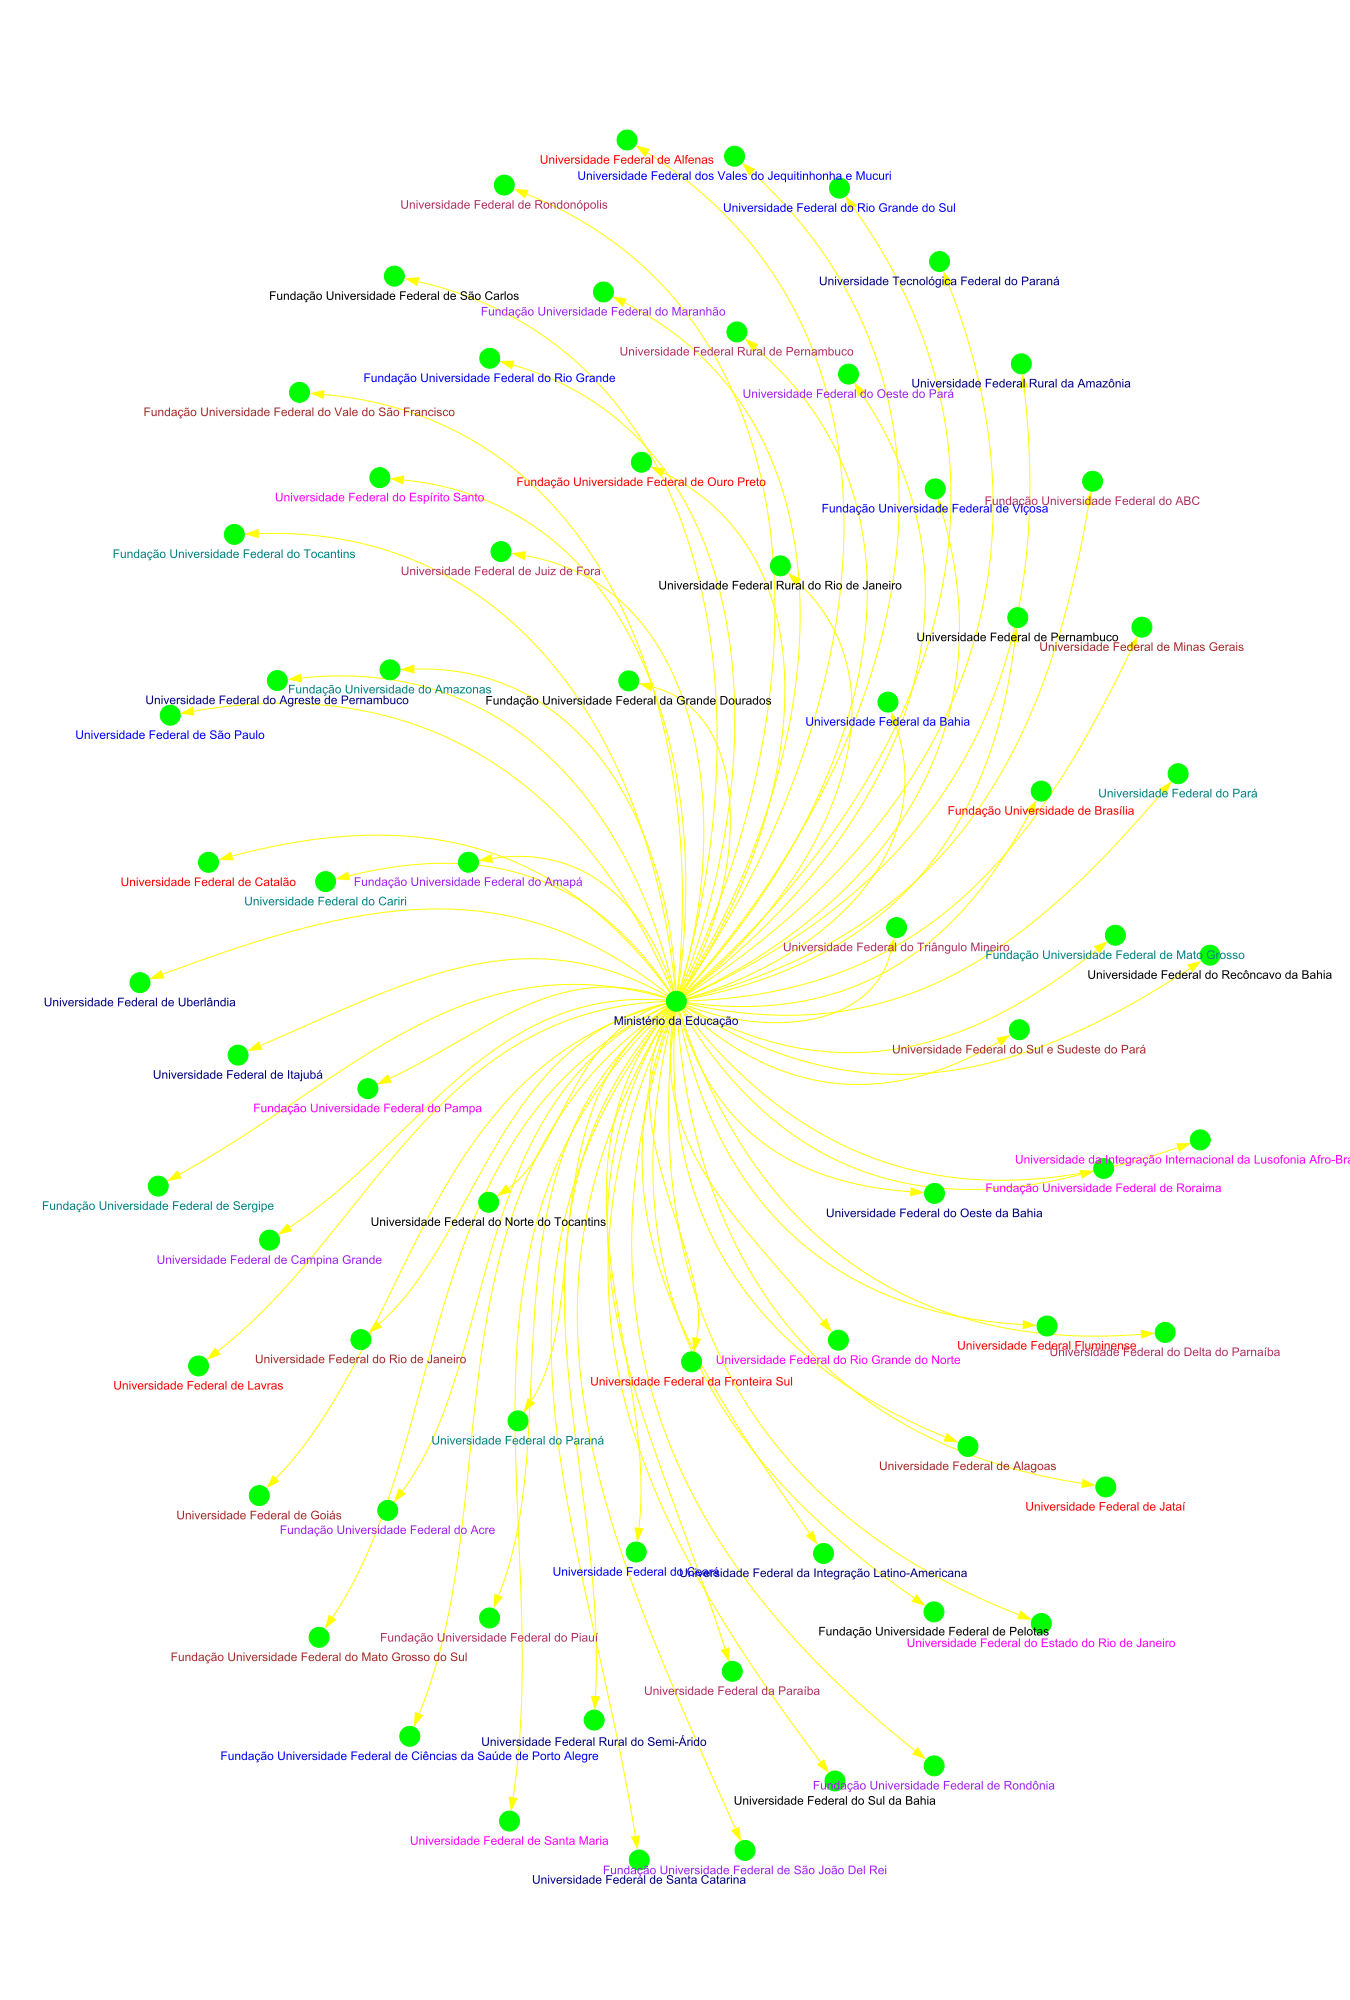

In [9]:
out_fig_name2022 = "grafo2022.eps"
grafo2022 = pickle.load(open("grafo2022.pkl", "rb"))
print(grafo2022.summary())
plot(grafo2022, out_fig_name2022, **visual_style_large)

In [10]:
print(grafo2019.summary())
print(grafo2020.summary())
print(grafo2021.summary())
print(grafo2022.summary())


IGRAPH DN-- 64 63 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v), weight (v)
IGRAPH DN-- 69 68 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v), weight (v)
IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v), weight (v)
IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v), weight (v)


[13, 64, 65, 66, 67]
IGRAPH DN-- 6 5 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v), weight (v)
{'weight': 0, 'name': 'Ministério Educação', 'label': 'Ministério da Educação'}
{'weight': 0, 'name': 'Universidade Federal Catalão', 'label': 'Universidade Federal de Catalão'}
{'weight': 0, 'name': 'Universidade Federal Jataí', 'label': 'Universidade Federal de Jataí'}
{'weight': 0, 'name': 'Universidade Federal do Delta do Parnaíba', 'label': 'Universidade Federal do Delta do Parnaíba'}
{'weight': 0, 'name': 'Universidade Federal Rondonópolis', 'label': 'Universidade Federal de Rondonópolis'}
{'weight': 0, 'name': 'Universidade Federal do Agreste Pernambuco', 'label': 'Universidade Federal do Agreste de Pernambuco'}
Ministério Educação ----> Universidade Federal Catalão {}
Ministério Educação ----> Universidade Federal Jataí {}
Ministério Educação ----> Universidade Federal do Delta do Parnaíba {}
Ministério Educação ----> Universidade Fe

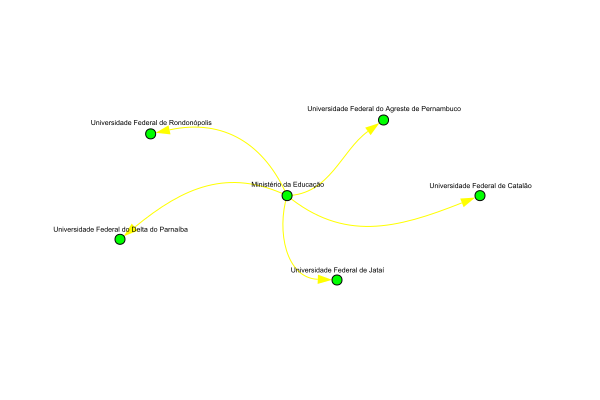

In [11]:
sub_diff_in_2020 = calc_diff_in(grafo2020,grafo2019)
print(sub_diff_in_2020.summary())
imprime_grafo(sub_diff_in_2020)    
visual_style_small["layout"] = sub_diff_in_2020.layout_reingold_tilford_circular()
plot(sub_diff_in_2020, "sub_diff_in_2020.eps", **visual_style_small)

[68]
IGRAPH DN-- 2 1 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v), weight (v)
{'weight': 0, 'name': 'Ministério Educação', 'label': 'Ministério da Educação'}
{'weight': 0, 'name': 'Universidade Federal do Norte do Tocantins', 'label': 'Universidade Federal do Norte do Tocantins'}
Ministério Educação ----> Universidade Federal do Norte do Tocantins {}


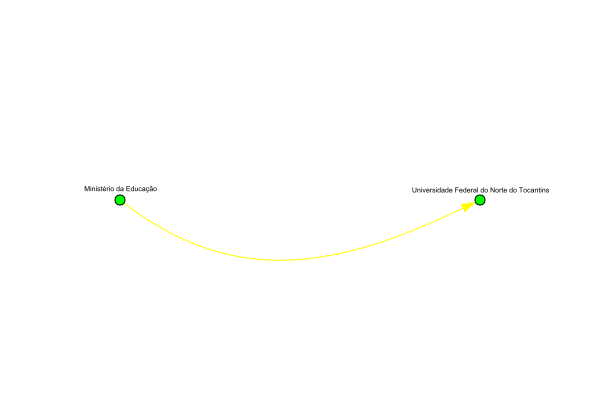

In [12]:
sub_diff_in_2021 = calc_diff_in(grafo2021,grafo2020)
print(sub_diff_in_2021.summary())
imprime_grafo(sub_diff_in_2021)
visual_style_small["layout"] = sub_diff_in_2021.layout_reingold_tilford_circular()
plot(sub_diff_in_2021, "sub_diff_in_2021.eps", **visual_style_small)

[]
IGRAPH DN-- 0 0 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v), weight (v)


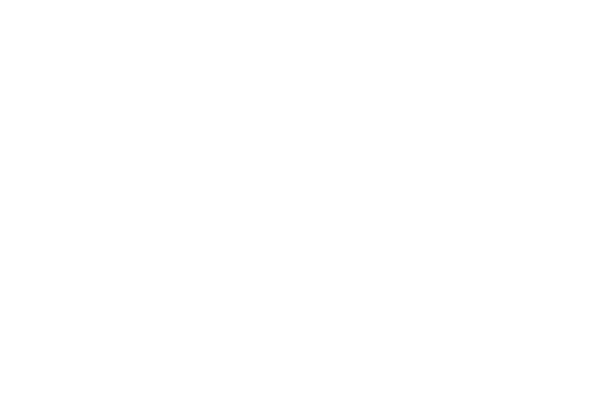

In [13]:
sub_diff_in_2022 = calc_diff_in(grafo2022,grafo2021)
print(sub_diff_in_2022.summary())
imprime_grafo(sub_diff_in_2022) 
visual_style_small["layout"] = sub_diff_in_2022.layout_reingold_tilford_circular()
plot(sub_diff_in_2022, "sub_diff_in_2022.eps", **visual_style_small)

#### Novas unidades

[1, 54, 57, 64, 67, 68]
IGRAPH DN-- 7 6 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v), weight (v)
{'weight': 0, 'name': 'Ministério Educação', 'label': 'Ministério da Educação'}
{'weight': 0, 'name': 'Universidade Federal do Norte do Tocantins', 'label': 'Universidade Federal do Norte do Tocantins'}
{'weight': 0, 'name': 'Universidade Federal do Delta do Parnaíba', 'label': 'Universidade Federal do Delta do Parnaíba'}
{'weight': 0, 'name': 'Universidade Federal Catalão', 'label': 'Universidade Federal de Catalão'}
{'weight': 0, 'name': 'Universidade Federal Rondonópolis', 'label': 'Universidade Federal de Rondonópolis'}
{'weight': 0, 'name': 'Universidade Federal Jataí', 'label': 'Universidade Federal de Jataí'}
{'weight': 0, 'name': 'Universidade Federal do Agreste Pernambuco', 'label': 'Universidade Federal do Agreste de Pernambuco'}
Ministério Educação ----> Universidade Federal do Norte do Tocantins {}
Ministério Educação ----> Un

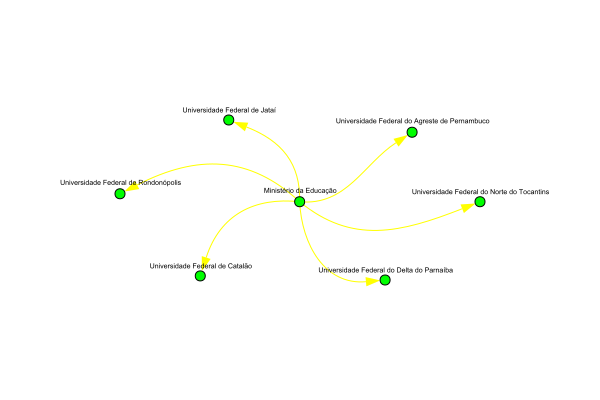

In [14]:
sub_diff_in_2022_2019 = calc_diff_in(grafo2022,grafo2019)
print(sub_diff_in_2022_2019.summary())
imprime_grafo(sub_diff_in_2022_2019)  
visual_style_small["layout"] = sub_diff_in_2022_2019.layout_reingold_tilford_circular()
plot(sub_diff_in_2022_2019, "sub_diff_in_2022_2019.eps", **visual_style_small)

#### Unidades excluídas

[]
IGRAPH DN-- 0 0 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v), weight (v)


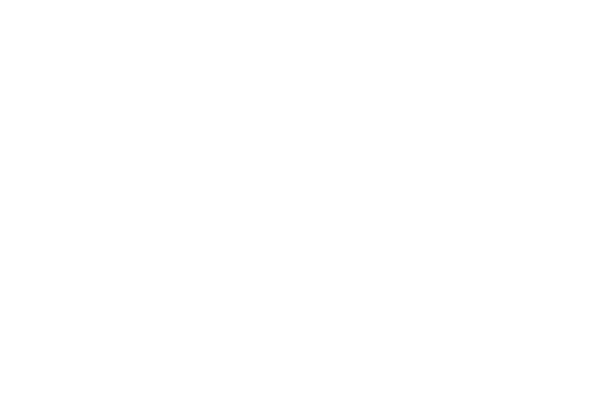

In [15]:
sub_diff_out_2019_2022 = calc_diff_in(grafo2019,grafo2022)
print(sub_diff_out_2019_2022.summary())
visual_style_small["layout"] = sub_diff_out_2019_2022.layout_reingold_tilford_circular()
plot(sub_diff_out_2019_2022, "sub_diff_out_2019_2022.eps", **visual_style_small)

In [16]:
big_frame

,id,tipo,emissor,data,responsavel,cargo
0,S01012019/1020_20190112_991201162-2,Decreto numerado,Atos do Poder Judiciário,12/01/2019,NaN,NaN
1,S01012019/1020_20190116_11391945,Lei,Atos do Poder Legislativo,16/01/2019,JAIR MESSIAS BOLSONARO,NaN
2,S01012019/515_20190102_11303736,Alvará,Ministério da Segurança Pública/Departamento d...,02/01/2019,ROSILENE GLEICE DUARTE SANTIAGO,NaN
3,S01012019/515_20190102_11303780,Alvará,Ministério da Segurança Pública/Departamento d...,02/01/2019,ROSILENE GLEICE DUARTE SANTIAGO,NaN
4,S01012019/515_20190102_11303801,Portaria,"Ministério da Ciência, Tecnologia, Inovações e...",02/01/2019,VILMA DE FÁTIMA ALVARENGA FANIS,NaN
...,...,...,...,...,...,...
3233679,S03112022/609_20221130_20116254,Aviso de Suspensão,Ministério da Defesa/Comando da Marinha/Empres...,30/11/2022,NAIR CARLA FROMENT TEIXEIRA,Pregoeira
3233680,S03112022/609_20221130_20116255,Resultado de Julgamento,Ministério da Economia/Empresa de Tecnologia e...,30/11/2022,MARIO HENRIQUE BERNARDO DA SILVA,Pregoeiro
3233681,S03112022/609_20221130_20116333,Extrato de Termo Aditivo,Ministério das Comunicações/Empresa Brasileira...,30/11/2022,NaN,NaN
3233682,S03112022/609_20221130_20116336,Extrato de Contrato,Ministério das Comunicações/Empresa Brasileira...,30/11/2022,NaN,NaN


In [17]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Agreste de Pernambuco')]
print(df_filtro.size)
df = df_filtro.iloc[[0, -1]]
df


882


,id,tipo,emissor,data,responsavel,cargo
1374158,S03122020/530_20201216_13160482,Aviso de Licitação-Pregão,Ministério da Educação/Universidade Federal do...,16/12/2020,CARLOS WILLIAN FERREIRA DE ARAUJO,Pregoeiro
3233206,S03112022/609_20221130_20113152,Aviso de Licitação-RDC Eletrônico,Ministério da Educação/Universidade Federal do...,30/11/2022,CARLOS WILLIAN FERREIRA DE ARAUJO,Diretor Dp Departamento de Compras


In [18]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Federal de Jataí')]
print(df_filtro.size)
df = df_filtro.iloc[[0, -1]]
df

4764


,id,tipo,emissor,data,responsavel,cargo
652419,S02012020/529_20200129_12388301,Portaria,Ministério da Educação/Universidade Federal de...,29/01/2020,Américo Nunes da Silveira Neto,NaN
3229440,S03112022/530_20221128_20107908,Extrato de Termo Aditivo,Ministério da Educação/Universidade Federal de...,28/11/2022,NaN,NaN


In [19]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade Federal de Rondonópolis')]
print(df_filtro.size)
df = df_filtro.iloc[[0, -1]]
df

4734


,id,tipo,emissor,data,responsavel,cargo
829378,S03032020/530_20200330_12537168,Ato Regulamentar,Ministério da Educação/Universidade Federal de...,30/03/2020,Analy Castilho Polizel de Souza,NaN
3233591,S03112022/609_20221130_20116163,Resultado de Julgamento,Ministério da Educação/Universidade Federal de...,30/11/2022,JAILSON JOSÉ DE ANDRADE,Diretor de Compras e Licitação


In [20]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Federal de Catalão')]
print(df_filtro.size)
df = df_filtro.iloc[[0, -1]]
df

4158


,id,tipo,emissor,data,responsavel,cargo
639892,S01012020/515_20200122_12368900,Resolução,Ministério da Educação/Universidade Federal de...,22/01/2020,ROSELMA LUCCHESE,NaN
3233306,S03112022/609_20221130_20113326,Extrato de Contrato,Ministério da Educação/Universidade Federal de...,30/11/2022,NaN,NaN


In [21]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Delta do Parnaíba')]
print(df_filtro.size)
df = df_filtro.iloc[[0, -1]]
df

1998


,id,tipo,emissor,data,responsavel,cargo
703142,S01022020/515_20200206_12407147,Resolução,Ministério da Educação/Universidade Federal do...,06/02/2020,ALEXANDRO MARINHO OLIVEIRA,NaN
3230109,S03112022/530_20221128_20108844,Edital,Ministério da Educação/Universidade Federal do...,28/11/2022,Alexandro Marinho Oliveira,NaN


In [22]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Norte do Tocantins')]
print(df_filtro.size)
df = df_filtro.iloc[[0, -1]]
df

870


,id,tipo,emissor,data,responsavel,cargo
2063951,S02102021/529_20211020_13927543,Portaria,Ministério da Educação/Universidade Federal do...,20/10/2021,AIRTON SIEBEN,NaN
3181067,S03112022/530_20221104_20041554,Extrato de Termo Aditivo,Ministério da Educação/Universidade Federal do...,04/11/2022,NaN,NaN


In [23]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
#df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Serviços Hospitalares')]
print(df_filtro.size)
df = df_filtro.iloc[[0, -1]]
df

230340


,id,tipo,emissor,data,responsavel,cargo
1183,S01012019/515_20190110_11378683,Portaria,Ministério da Educação/Empresa Brasileira de S...,10/01/2019,ARNALDO CORREIA DE MEDEIROS,NaN
3233589,S03112022/609_20221130_20116161,Aviso de Adiamento,Ministério da Educação/Empresa Brasileira de S...,30/11/2022,ADRIANA COUTINHO DA CUNHA CAVALCANTE,Agente de Licitação


In [24]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Fundação da Universidade Federal de São Carlos')]
print(df_filtro.size)
df = df_filtro.iloc[[0, -1]]
df


1506


,id,tipo,emissor,data,responsavel,cargo
68516,S01022019/515_20190226_11492842,Portaria,Ministério da Educação/Fundação da Universidad...,26/02/2019,Wanda Aparecida Machado Hoffmann,NaN
253913,S03042019/530_20190426_11640159,Extrato de Contrato,Ministério da Educação/Fundação da Universidad...,26/04/2019,NaN,NaN


0
IGRAPH DN-- 2 1 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v)
{'name': 'M', 'label': 'Min'}
{'name': 'Q', 'label': 'Qqqqqq'}
M ----> Q {}
IGRAPH DN-- 4 3 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)
{'name': 'M', 'label': 'Min'}
{'name': 'O', 'label': 'Ooooo'}
{'name': 'Q', 'label': 'Qqqqqq'}
{'name': 'P', 'label': 'Ppppp'}
M ----> O {}
M ----> Q {}
M ----> P {}
[0, 2]
IGRAPH DN-- 3 2 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)


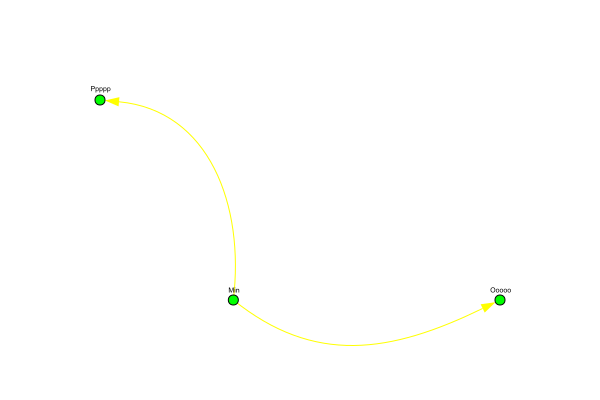

In [25]:
g2019 = ig.Graph(directed=True)
g2019["name"]="Unidades Organizacionais da Administração Pública - 2019" 
va1 = g2019.add_vertex('M')
va1['label']='Min'
va2 = g2019.add_vertex('Q')
va2['label']='Qqqqqq'
eaMO = g2019.add_edge('M','Q')
print(eaMO.index)
g2022 = ig.Graph(directed=True)
g2022["name"]="Unidades Organizacionais da Administração Pública - 2022" 
vb1 = g2022.add_vertex('M')
vb1['label']='Min'
vb2 = g2022.add_vertex('O')
vb2['label']='Ooooo'
vb2 = g2022.add_vertex('Q')
vb2['label']='Qqqqqq'
vb2 = g2022.add_vertex('P')
vb2['label']='Ppppp'

g2022.add_edge('M','O')
g2022.add_edge('M','Q')
g2022.add_edge('M','P')

print(g2019.summary())
imprime_grafo(g2019)
print(g2022.summary())
imprime_grafo(g2022) 

sub_diff_in_19_22 = calc_diff_in(g2022,g2019)
print(sub_diff_in_19_22.summary())

visual_style["margin"] = 100
visual_style["layout"] = sub_diff_in_19_22.layout_reingold_tilford_circular()
plot(sub_diff_in_19_22, "sub_diff_in_19_22.eps", **visual_style)